In [81]:
%matplotlib inline

In [82]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib as mpl
from graph_tool.generation import lattice
from graph_tool.draw import graph_draw
from graph_tool import openmp_set_num_threads
from itertools import chain
from collections import Counter
from tqdm import tqdm
from copy import copy
from scipy.spatial.distance import cosine, euclidean
from matplotlib import pyplott as plt


from graph_helpers import load_graph_by_name, extract_edges, extract_nodes
from viz_helpers import lattice_node_pos
from experiment import gen_input
from helpers import infected_nodes
from core import sample_steiner_trees
from tree_stat import TreeBasedStatistics
from random_steiner_tree.util import from_gt

from root_sampler import build_root_sampler_by_pagerank_score
from sklearn.metrics import average_precision_score, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


In [2]:
openmp_set_num_threads(1)

In [115]:
graph_name = 'lattice-1024'
suffix = 's0.02'
qs = ['0.1', '0.25', '0.5', '0.75']
aspect = 'f1'
eval_metric = 'mean'
root_sampling_method = 'random_root'

g = load_graph_by_name(graph_name, weighted=True, suffix='_'+suffix)

load graph from data/lattice-1024/graph_weighted_s0.02.gt


In [116]:
methods = ['pagerank-eps0.0', 'pagerank-eps0.5', 'pagerank-eps1.0', 'random_root', 'true root']

columns_to_plot = []
for q in qs:
    result_path = 'eval_result/{}-{}-q{}-by_root_sampling_methods.pkl'.format(graph_name, suffix, q)
    row = pkl.load(open(result_path, 'rb'))
    print('q={}'.format(q))
    print('-' * 10)
    print(row[aspect][root_sampling_method])
    columns_to_plot.append(row[aspect][root_sampling_method].loc['50%'].as_matrix())
#     for m in methods:
#         print(m)
#         print(row[aspect][m])

q=0.1
----------
           random      st_inc    st_naive
count  768.000000  768.000000  768.000000
mean     0.039385    0.444733    0.105604
std      0.026863    0.104284    0.107916
min      0.003690    0.117647    0.000000
25%      0.019646    0.368270    0.000000
50%      0.031527    0.444444    0.097800
75%      0.051188    0.523976    0.181818
max      0.188800    0.700000    0.545455
q=0.25
----------
           random      st_inc    st_naive
count  768.000000  768.000000  768.000000
mean     0.034679    0.346475    0.365371
std      0.025181    0.075676    0.173758
min      0.003711    0.162162    0.000000
25%      0.018519    0.293354    0.241818
50%      0.027264    0.339134    0.390244
75%      0.043282    0.392541    0.489116
max      0.206897    0.628571    0.814815
q=0.5
----------
           random      st_inc    st_naive
count  768.000000  768.000000  768.000000
mean     0.025192    0.231617    0.589475
std      0.017525    0.051578    0.156297
min      0.000000    0.1

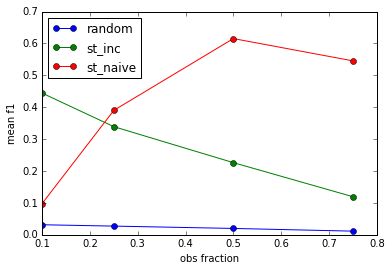

In [117]:
rows_to_plot = np.array(columns_to_plot).T
xs = list(map(float, qs))
for r in rows_to_plot:
    plt.plot(xs, r, 'o-')
plt.legend(row[aspect][root_sampling_method].columns, loc='best')    
plt.xlabel('obs fraction')
plt.ylabel(eval_metric + ' ' + aspect)

In [121]:
plt.savefig('figs/sampling-methods-eval-by-q/{}-{}.pdf'.format(graph_name, suffix, q))